<a href="https://colab.research.google.com/github/AdrianPauer/BIO-INF-project/blob/main/BIO_INF_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('sample_data/METABRIC_RNA_Mutation.csv')

<ipython-input-5-fad4df68e31b>:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sample_data/METABRIC_RNA_Mutation.csv')


In [6]:
data

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,7295,43.10,BREAST CONSERVING,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,LumA,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1900,7296,42.88,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1901,7297,62.90,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1902,7298,61.16,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,4.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data['cancer_type_detailed'].value_counts()

,count
cancer_type_detailed,
Breast Invasive Ductal Carcinoma,1500
Breast Mixed Ductal and Lobular Carcinoma,207
Breast Invasive Lobular Carcinoma,142
Breast Invasive Mixed Mucinous Carcinoma,22
Breast,17
Metaplastic Breast Cancer,1


In [8]:
# first 31 columns -> ordinary features
# then 331 cloums -> genes expressions
# then 175 mutation genes

# take only columns with dtype == float
# throw away muataion columns (all zeros)
appropriate_cols = data.columns[data.dtypes == 'float64']
appropriate_cols

Index(['age_at_diagnosis', 'cohort', 'neoplasm_histologic_grade',
       'lymph_nodes_examined_positive', 'mutation_count',
       'nottingham_prognostic_index', 'overall_survival_months', 'tumor_size',
       'tumor_stage', 'brca1',
       ...
       'srd5a1', 'srd5a2', 'srd5a3', 'st7', 'star', 'tnk2', 'tulp4', 'ugt2b15',
       'ugt2b17', 'ugt2b7'],
      dtype='object', length=498)

In [9]:
target_column = 'cancer_type_detailed'
appropriate_cols =  [target_column] + list(appropriate_cols)
subset = data[appropriate_cols]

In [10]:
# missing values in subset
print(subset.isna().sum()[subset.isna().sum() != 0])

cancer_type_detailed          15
neoplasm_histologic_grade     72
mutation_count                45
tumor_size                    20
tumor_stage                  501
dtype: int64


In [11]:
# drop colums with many missing values (tumor stage, historic_grade)
subset.drop(['tumor_stage', 'neoplasm_histologic_grade'], axis=1, inplace=True)

<ipython-input-11-611f19d5e671>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.drop(['tumor_stage', 'neoplasm_histologic_grade'], axis=1, inplace=True)


In [12]:
# replace another columns with mean
subset['tumor_size'] = subset['tumor_size'].fillna(subset['tumor_size'].mean())
subset['mutation_count'] = subset['mutation_count'].fillna(subset['mutation_count'].mean())

<ipython-input-12-034713b6bcbd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['tumor_size'] = subset['tumor_size'].fillna(subset['tumor_size'].mean())
<ipython-input-12-034713b6bcbd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['mutation_count'] = subset['mutation_count'].fillna(subset['mutation_count'].mean())


In [13]:
# remove rows from dataset with Nans in target column
subset = subset.loc[pd.notna(subset['cancer_type_detailed']), :]

In [14]:
# missing values after preprocessing
print(subset.isna().sum())

cancer_type_detailed             0
age_at_diagnosis                 0
cohort                           0
lymph_nodes_examined_positive    0
mutation_count                   0
                                ..
tnk2                             0
tulp4                            0
ugt2b15                          0
ugt2b17                          0
ugt2b7                           0
Length: 497, dtype: int64


In [15]:
# after preprocessing
subset

,cancer_type_detailed,age_at_diagnosis,cohort,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,tumor_size,brca1,brca2,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,Breast Invasive Ductal Carcinoma,75.65,1.0,10.0,5.697687,6.044,140.500000,22.0,-1.3990,-0.5738,...,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,Breast Invasive Ductal Carcinoma,43.19,1.0,0.0,2.000000,4.020,84.633333,10.0,-1.3800,0.2777,...,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,Breast Invasive Ductal Carcinoma,48.87,1.0,1.0,2.000000,4.030,163.700000,15.0,0.0670,-0.8426,...,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,Breast Mixed Ductal and Lobular Carcinoma,47.68,1.0,3.0,1.000000,4.050,164.933333,25.0,0.6744,-0.5428,...,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,Breast Mixed Ductal and Lobular Carcinoma,76.97,1.0,8.0,2.000000,6.080,41.366667,40.0,1.2932,-0.9039,...,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,Breast Invasive Lobular Carcinoma,43.10,4.0,1.0,4.000000,5.050,196.866667,25.0,0.1563,0.5543,...,0.7859,1.5304,1.1196,0.8116,0.0958,-1.2644,-0.3566,-0.2615,-0.6371,-0.5540
1900,Breast Invasive Ductal Carcinoma,42.88,4.0,1.0,6.000000,5.040,44.733333,20.0,0.1343,0.9128,...,-0.5294,-0.6610,-0.1610,0.2251,0.5127,-0.3412,-1.0703,-0.6950,0.0641,-0.8863
1901,Breast Invasive Ductal Carcinoma,62.90,4.0,45.0,4.000000,6.050,175.966667,25.0,1.8107,-0.2608,...,-0.1457,-0.5194,2.3968,0.5917,-0.8643,-1.3541,-1.8076,-0.1840,0.0967,-0.6264
1902,Breast Invasive Ductal Carcinoma,61.16,4.0,12.0,15.000000,5.050,86.233333,25.0,-1.2746,-1.7695,...,-0.6380,-1.5275,1.1070,0.2194,1.4317,-0.6985,-0.6046,-0.4915,-0.2847,-0.8041


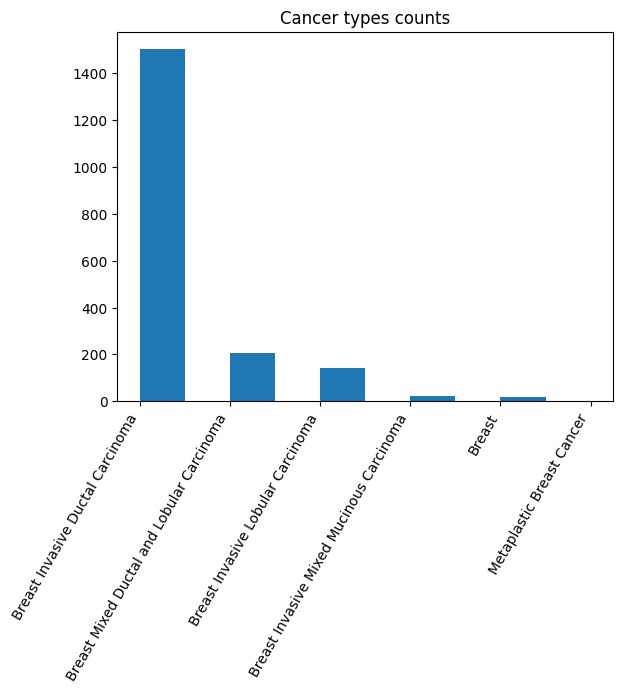

In [16]:
# target column
y = subset['cancer_type_detailed']
plt.hist(y)
plt.xticks(rotation=60, ha='right')
plt.title('Cancer types counts')
plt.show()

In [17]:
# target value -> 6 classes quite imbalanced -> drop breast and metaplastic cancer
subset = subset.loc[subset['cancer_type_detailed'] != 'Breast', :]
subset = subset.loc[subset['cancer_type_detailed'] != 'Metaplastic Breast Cancer' , :]
y = subset['cancer_type_detailed'].astype('category')
subset.drop('cancer_type_detailed', axis=1, inplace=True)
print(y.value_counts())


cancer_type_detailed
Breast Invasive Ductal Carcinoma             1500
Breast Mixed Ductal and Lobular Carcinoma     207
Breast Invasive Lobular Carcinoma             142
Breast Invasive Mixed Mucinous Carcinoma       22
Name: count, dtype: int64


In [18]:
target = y.cat.codes
print(target.value_counts())

0    1500
3     207
1     142
2      22
Name: count, dtype: int64


In [19]:
# split data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(subset,target, train_size=0.8,
                                                   random_state=None,
                                                   shuffle=True, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

0    1199
3     165
1     114
2      18
Name: count, dtype: int64
0    301
3     42
1     28
2      4
Name: count, dtype: int64


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# pass argument 'class_weight' = balanced
param_grid = {
    'max_depth': [5, 10, 20,50, 100, 150, 200, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5 ,10],
    'class_weight': ['balanced']
}

dt = DecisionTreeClassifier(random_state=0)

# use scoring 'f1 macro' for unbalanced dataset
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [5, 10, 20, 50, 100, 150, 200, None],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro', verbose=1)

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best macro F1:", grid_search.best_score_)

Best parameters: {'class_weight': 'balanced', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best macro F1: 0.35846727760838953


In [ ]:
# train best decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced', max_depth=50,
                                min_samples_leaf=1, min_samples_split=5)

dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', max_depth=50,
                       min_samples_split=5, random_state=0)

0.6853333333333333
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       301
           1       0.15      0.18      0.16        28
           2       0.20      0.25      0.22         4
           3       0.11      0.10      0.10        42

    accuracy                           0.69       375
   macro avg       0.32      0.34      0.33       375
weighted avg       0.68      0.69      0.68       375



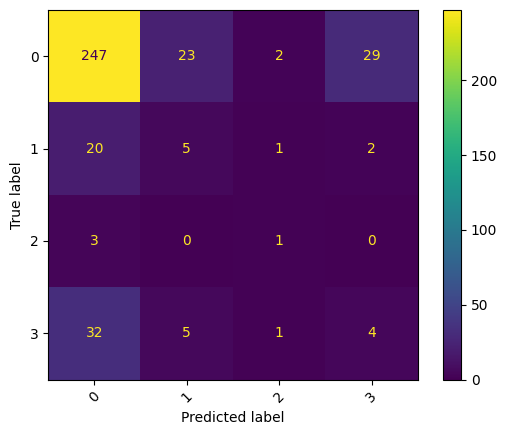

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

y_pred = dt_clf.predict(X_test)
print(dt_clf.score(X_test, y_test))
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(dt_clf, X_test, y_test, xticks_rotation=45)

In [ ]:
# try to use stronger calssifier
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'n_estimators': [1, 2, 5, 50,100],
    'max_depth': [10, 20,50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best macro F1:", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 5}
Best macro F1: 0.33256383671080975


              precision    recall  f1-score   support

           0       0.82      0.82      0.82       301
           1       0.14      0.11      0.12        28
           2       1.00      0.25      0.40         4
           3       0.12      0.14      0.13        42

    accuracy                           0.69       375
   macro avg       0.52      0.33      0.37       375
weighted avg       0.69      0.69      0.69       375



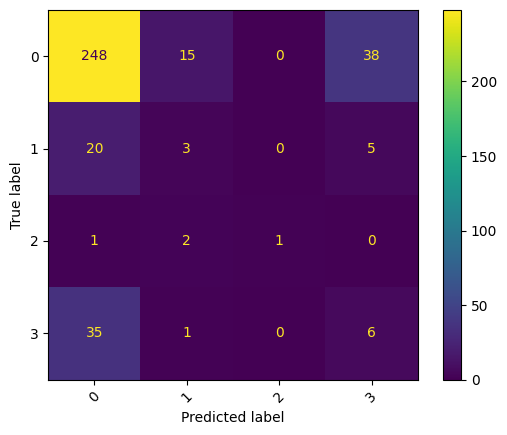

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10,
                            min_samples_leaf=2, min_samples_split=10, n_estimators=5, max_features='sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, xticks_rotation=45)

['col6a3', 'srd5a1', 'ccnd2', 'diras3', 'cdh1', 'map3k1', 'slc29a1', 'adam10', 'hras', 'rdh5']


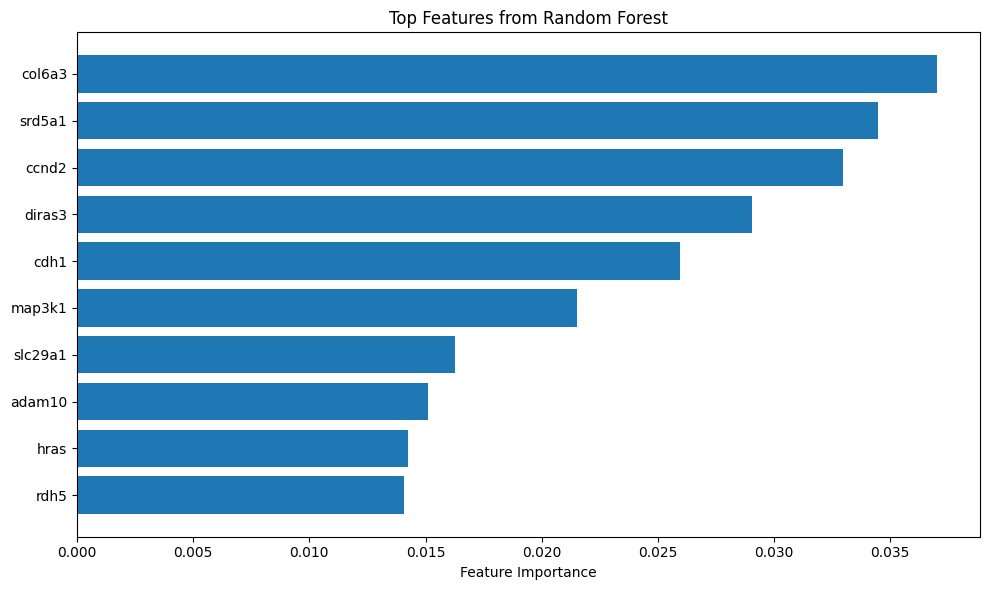

In [ ]:
importances = rf.feature_importances_

feature_names = subset.columns
top_n = 10
indices = np.argsort(importances)[::-1][:top_n]

print([feature_names[i] for i in indices])

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[indices], align='center')
plt.yticks(range(top_n), [feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top Features from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# identify important features and try to train classifier only on this important features
non_zero_indices = np.where(importances > 0)[0]
important_features = [feature_names[i] for i in non_zero_indices]

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       301
           1       0.20      0.14      0.17        28
           2       0.00      0.00      0.00         4
           3       0.14      0.10      0.11        42

    accuracy                           0.74       375
   macro avg       0.29      0.28      0.29       375
weighted avg       0.69      0.74      0.72       375

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

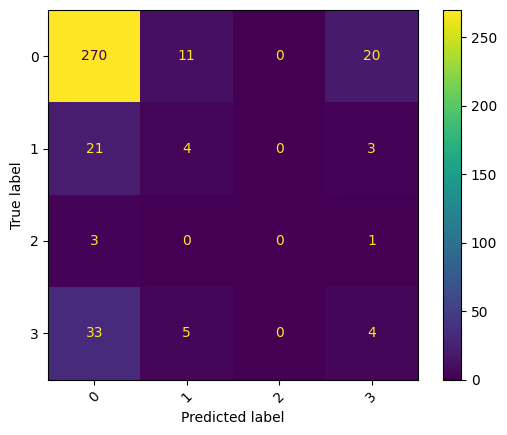

In [ ]:
# train classifier with reduced features
rf = RandomForestClassifier(random_state=42, class_weight='balanced', max_depth=10,
                            min_samples_leaf=2, min_samples_split=10, n_estimators=5, max_features='sqrt')
rf.fit(X_train[important_features], y_train)

y_pred = rf.predict(X_test[important_features])
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf, X_test[important_features], y_test, xticks_rotation=45)

In [ ]:
# normalise features for svm classifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, scoring='f1_macro', cv=5)
grid.fit(X_train_scaled, y_train)

print("Best F1-macro:", grid.best_score_)
print("Best parameters:", grid.best_params_)

Best F1-macro: 0.3733598755414373
Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


              precision    recall  f1-score   support

           0       0.84      0.77      0.80       301
           1       0.29      0.32      0.31        28
           2       0.00      0.00      0.00         4
           3       0.11      0.17      0.13        42

    accuracy                           0.66       375
   macro avg       0.31      0.31      0.31       375
weighted avg       0.71      0.66      0.68       375



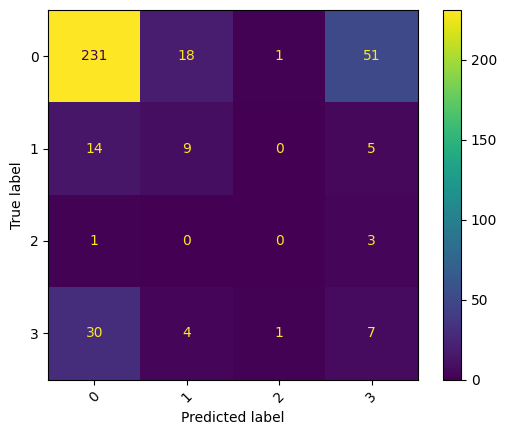

In [ ]:
clf = SVC(C=0.1, class_weight='balanced', gamma='scale', kernel='linear')
clf.fit(X_train_scaled, y_train)

y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test, xticks_rotation=45)#

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       301
           1       0.31      0.36      0.33        28
           2       0.00      0.00      0.00         4
           3       0.29      0.19      0.23        42

    accuracy                           0.76       375
   macro avg       0.36      0.36      0.36       375
weighted avg       0.74      0.76      0.75       375

/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/root/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

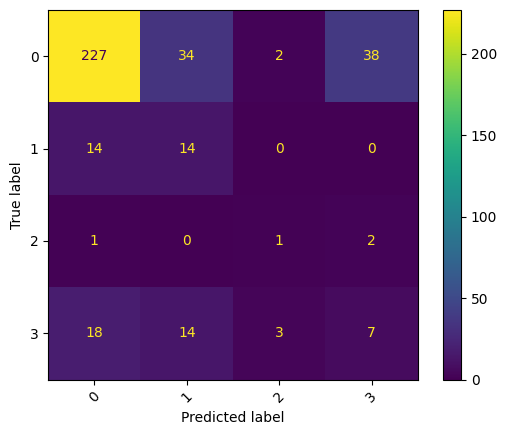

In [ ]:
# try mlp classifier
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=(50,100)).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test, xticks_rotation=45)